# AMD and Google Historical Stock Price Analysis with EDA

#### Dataset: 
https://www.kaggle.com/gunhee/amdgoogle

Original Data is from yahoo.com/finance
- AMD and GOOGLE historical price
- 5/22/2009 ~ 5/03/2017 daily price and volume.
- 7 columns: Date, open, high, low, close, volume, adj close

### Load and Explore Data

In [1]:
import pandas as pd

# load data, parse_dates from 'Date' column, then set 'Date' as index
df_amd = pd.read_csv('AMD.csv', parse_dates = ['Date'],index_col=['Date'])
df_google = pd.read_csv('GOOGL.csv',parse_dates = ['Date'],index_col=['Date'])

df_amd.shape, df_google.shape

((2335, 6), (2335, 6))

If we don't parse_dates when loading in the file, we can also convert the column'Date' to datime object and set it as index later on using below codes:

df_amd['Date'] = pd.to_datetime(df_amd['Date']) <br>
df_amd.set_index('Date',inplace=True)

In [2]:
df_amd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2335 entries, 2009-05-22 to 2018-08-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2335 non-null   float64
 1   High       2335 non-null   float64
 2   Low        2335 non-null   float64
 3   Close      2335 non-null   float64
 4   Adj Close  2335 non-null   float64
 5   Volume     2335 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.7 KB


In [3]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2335 entries, 2009-05-22 to 2018-08-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2335 non-null   float64
 1   High       2335 non-null   float64
 2   Low        2335 non-null   float64
 3   Close      2335 non-null   float64
 4   Adj Close  2335 non-null   float64
 5   Volume     2335 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 127.7 KB


In [4]:
df_amd.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df_google.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The dataset is pretty clean with no missing value.

### Exploratory Data Analysis

In [6]:
df_amd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,6.434732,6.563961,6.300887,6.433221,6.433221,3.107491e+07
std,3.872391,3.954999,3.792914,3.879124,3.879124,2.791149e+07
min,1.620000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,3.480000,3.550000,3.405000,3.465000,3.465000,1.421670e+07
50%,5.580000,5.720000,5.450000,5.600000,5.600000,2.228020e+07
75%,8.555000,8.710000,8.375000,8.565000,8.565000,3.776905e+07
max,25.510000,27.299999,24.629999,25.260000,25.260000,3.250584e+08


In [7]:
df_google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2.335000e+03
mean,550.725409,555.136744,545.908515,550.662757,550.662757,3.764886e+06
std,278.136894,280.349025,275.855161,278.228484,278.228484,2.764696e+06
min,196.171173,199.524521,195.195190,196.946945,196.946945,5.206000e+05
25%,299.286773,301.759247,297.197204,299.144135,299.144135,1.734650e+06
50%,526.211182,532.780029,521.909973,527.767761,527.767761,3.250200e+06
75%,757.760010,763.745025,752.024994,758.524993,758.524993,4.891800e+06
max,1289.119995,1291.439941,1263.000000,1285.500000,1285.500000,2.961990e+07


The mean,min and max values indicate these 2 stocks' prices have very different ranges. Next, we will use visualizations to show the stock trends.

#### Detecting Outliers with Boxplots


Bad key "text.kerning_factor" on line 4 in
c:\anaconda3\envs\py36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


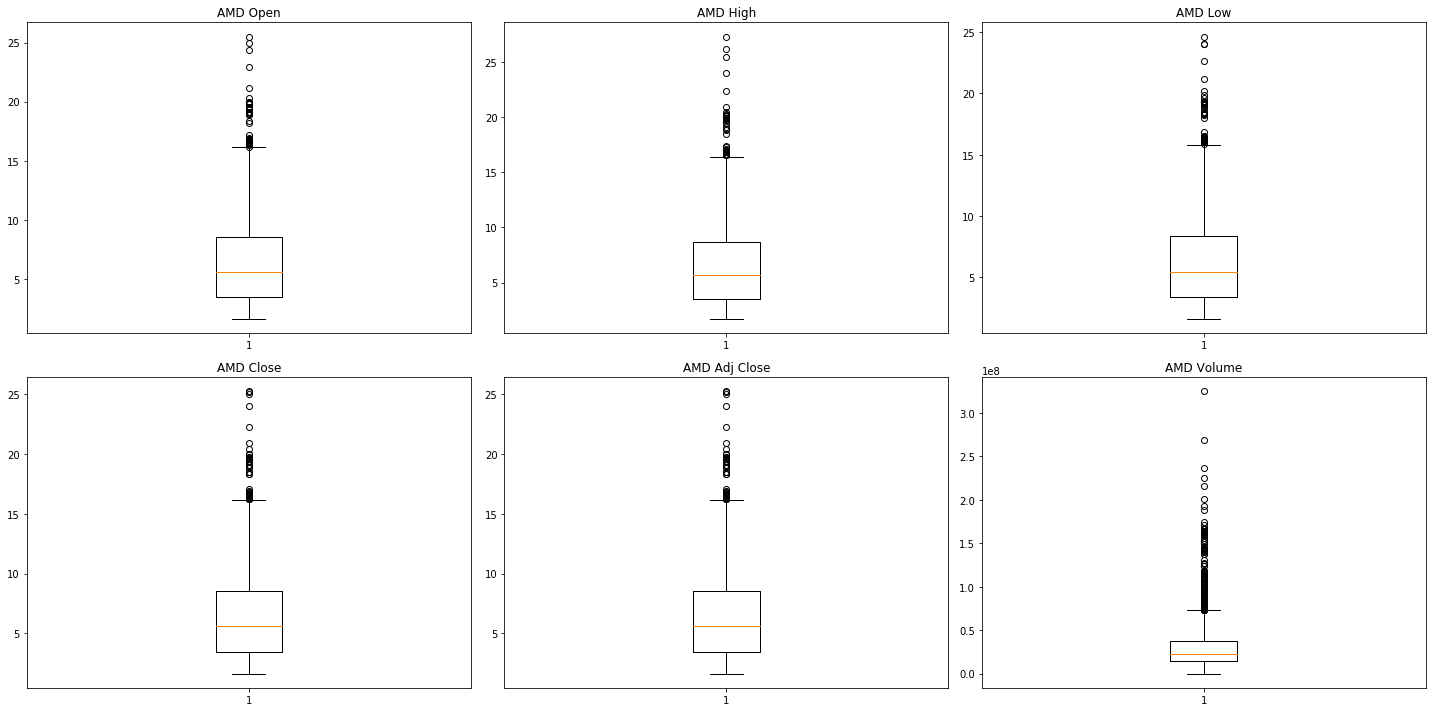

In [8]:
# plot AMD stock

import matplotlib.pyplot as plt

column_list = list(df_amd.columns)
figure, ax = plt.subplots(2,3,figsize=(20,10))        # ax is 2 by 3 array after this code

for column, curr_ax in zip(column_list, ax.ravel()):  # use ax.ravel() to flatten ax in order to zip
    curr_ax.boxplot(df_amd[column])       
    curr_ax.set_title(f'AMD {column}')

plt.tight_layout()
plt.show()   

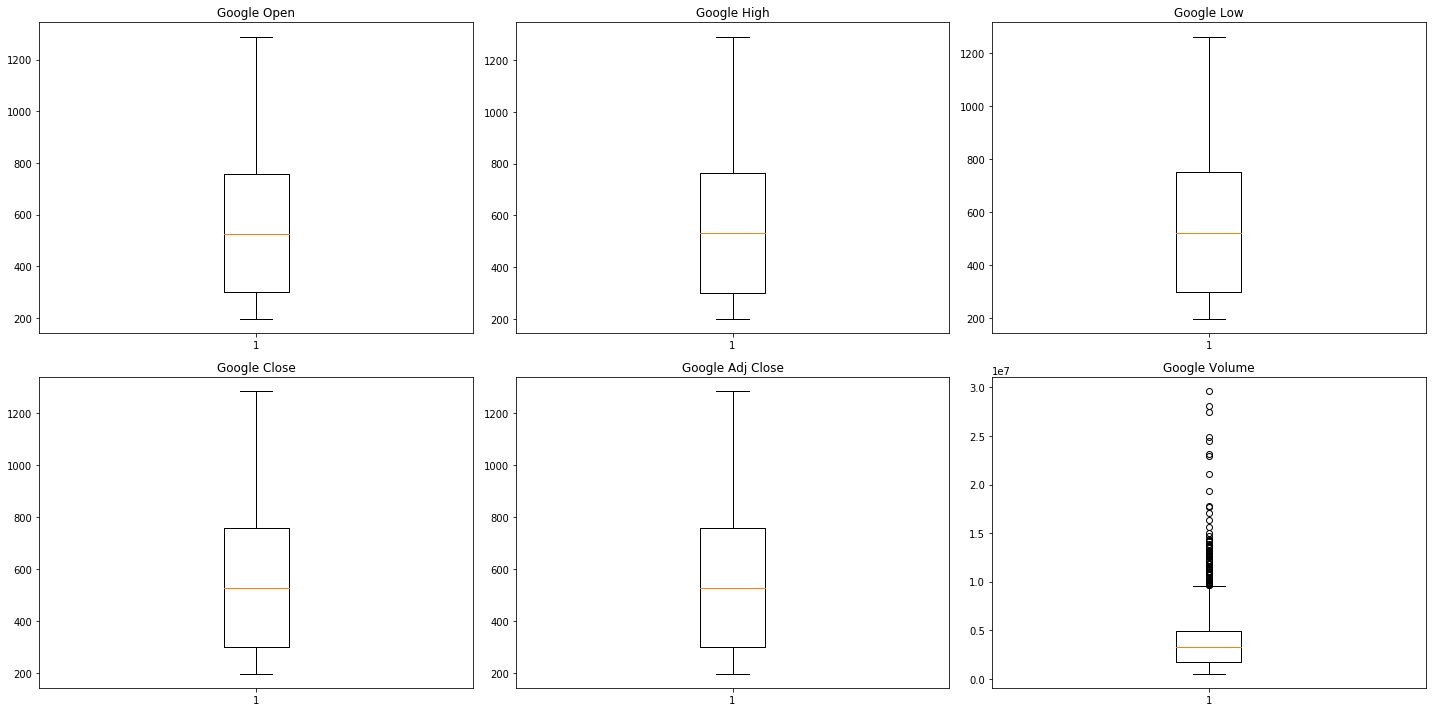

In [9]:
# plot Google stock

column_list1 = list(df_google.columns)

figure, ax = plt.subplots(2,3,figsize=(20,10))  

for column, curr_ax1 in zip(column_list1, ax.ravel()):  
    curr_ax1.boxplot(df_google[column])       
    curr_ax1.set_title(f'Google {column}')

plt.tight_layout()
plt.show()  

AMD has outliers in every feature while Google stock only has outliers in volume. 

In [10]:
# we could also detect outliners using below codes
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

#### Line Plots to Show Highest Prices Over Time

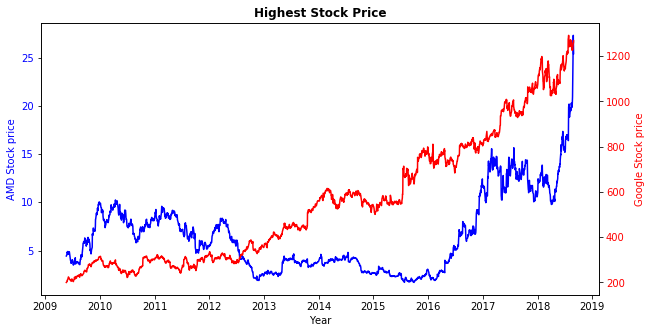

In [11]:
# plot highest stock price for both stocks over the years

import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10,5))

ax.plot(df_amd.index, df_amd.High, color='blue',label='AMD')
ax.set_title('Highest Stock Price', fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('AMD Stock price',color='blue') # use the same color as ax.plot
ax.tick_params('y',labelcolor='blue')         # use the same color in label

'''
use twinX for next plot since these 2 stocks have very different price ranges, 
or the AMD plot will look like flat.
'''
ax2 = ax.twinx()    
ax2.plot(df_google.index, df_google.High, color='red',label='Google')
ax2.set_ylabel('Google Stock price', color='red') # use the same color as axs.plot
ax2.tick_params('y',labelcolor='red')             # use the same color in label

plt.show()

Google's highest stock price has been increasing steadily while AMD's highest stock price had fluctuated over the years with the lowest in 2012 and started to increase from 2016. 

#### Bar Plots to Find Highest/Lowest Volumes

Text(0, 0.5, 'Stock Price')

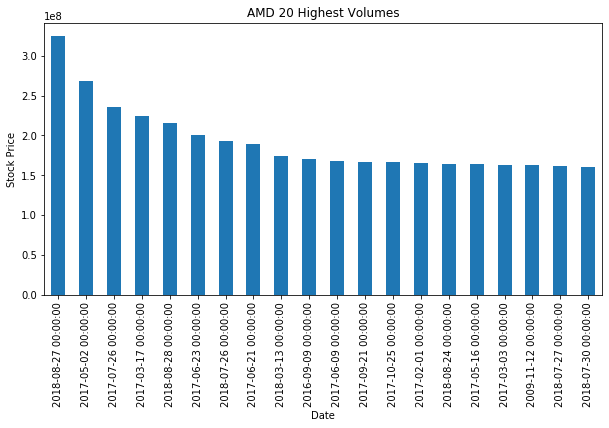

In [12]:
# plot the 20 highest stock volumes of AMD
df_amd.Volume.nlargest(20).plot(kind='bar',figsize=(10,5))
plt.title("AMD 20 Highest Volumes")
plt.ylabel('Stock Price')

AMD stock on 08/27/2018 had the highest volume, maybe some announcement about company strategy was made around this time.

Text(0, 0.5, 'Stock Price')

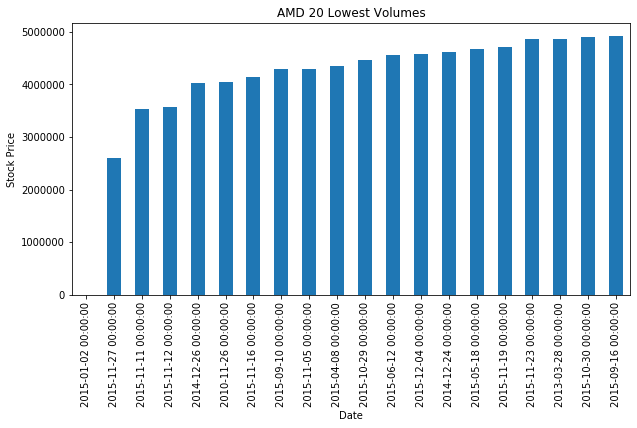

In [13]:
# plot the 20 lowest stock volumes of AMD
df_amd.Volume.nsmallest(20).plot(kind='bar',figsize=(10,5))
plt.title("AMD 20 Lowest Volumes")
plt.ylabel('Stock Price')

The 20 lowest volume days of AMD were all in 2014-2015. 

Text(0, 0.5, 'Stock Price')

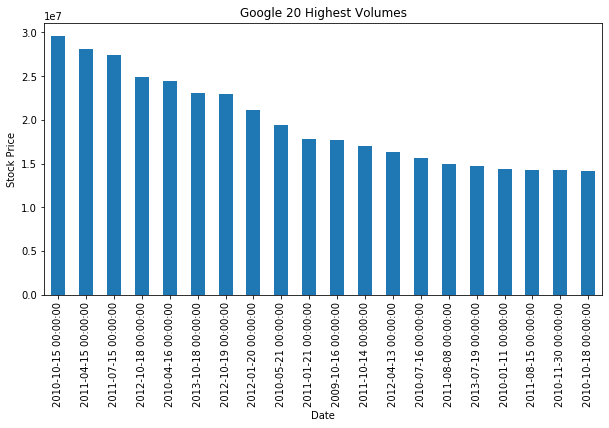

In [14]:
# plot the 20 highest stock volumes of Google
df_google.Volume.nlargest(20).plot(kind='bar',figsize=(10,5))
plt.title("Google 20 Highest Volumes")
plt.ylabel('Stock Price')

Google's highest volume happened in 10/15/2010 and that's when its stock price was very low.

Text(0, 0.5, 'Stock Price')

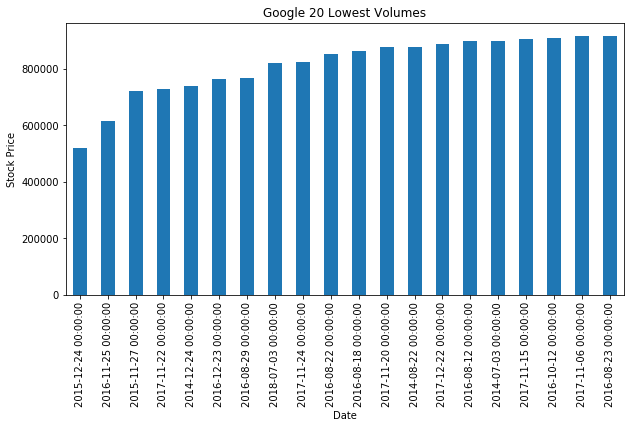

In [15]:
# plot the 20 lowest stock volumes of Google
df_google.Volume.nsmallest(20).plot(kind='bar',figsize=(10,5))
plt.title("Google 20 Lowest Volumes")
plt.ylabel('Stock Price')

Similar to AMD, Google's lowest stock volume also happened in 2015.

#### Scatter Plots to Check Correlations

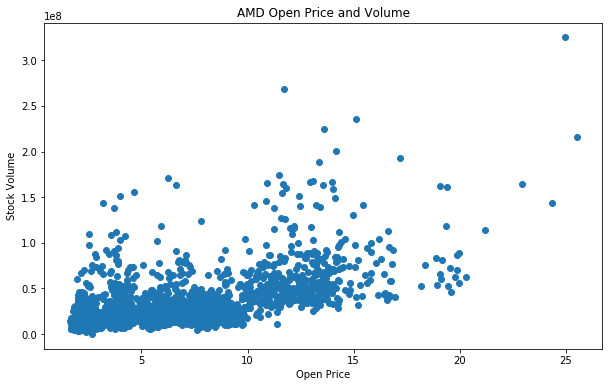

In [16]:
# plot the correlation between open price and stock volume for AMD

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_amd['Open'], df_amd['Volume'])
ax.set_title('AMD Open Price and Volume')
ax.set_xlabel('Open Price')
ax.set_ylabel('Stock Volume')
plt.show()

The open price and volume for AMD are slightly postively correlated.

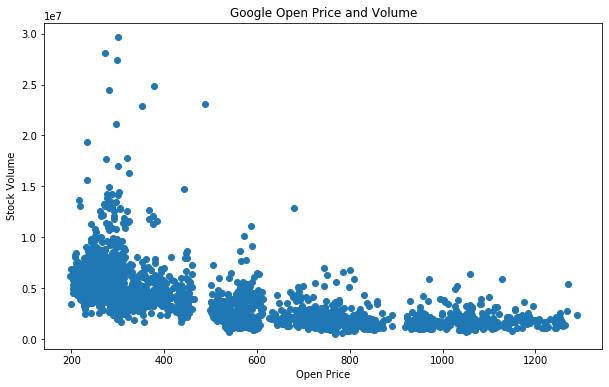

In [17]:
# plot the correlation between open price and stock volume for Google

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_google['Open'], df_google['Volume'])
ax.set_title('Google Open Price and Volume')
ax.set_xlabel('Open Price')
ax.set_ylabel('Stock Volume')
plt.show()

The open price and volume for AMD are slightly negatively correlated.

#### Heat Map to Check Correlations

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999364,0.999352,0.998658,0.998658,0.579491
High,0.999364,1.000000,0.999261,0.999427,0.999427,0.590739
Low,0.999352,0.999261,1.000000,0.999423,0.999423,0.569752
Close,0.998658,0.999427,0.999423,1.000000,1.000000,0.579457
Adj Close,0.998658,0.999427,0.999423,1.000000,1.000000,0.579457
Volume,0.579491,0.590739,0.569752,0.579457,0.579457,1.000000


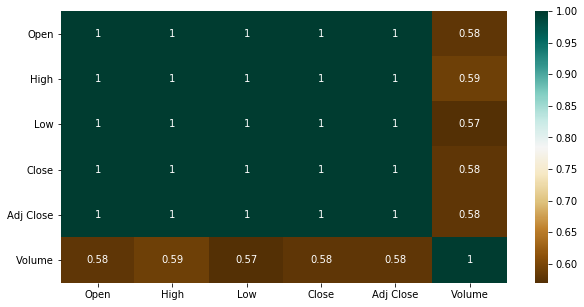

In [18]:
# plot heatmap for AMD

import seaborn as sns

plt.figure(figsize=(10,5))
cor_amd= df_amd.corr()
sns.heatmap(cor_amd,cmap="BrBG",annot=True)

cor_amd

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999879,0.999815,0.999687,0.999687,-0.573989
High,0.999879,1.000000,0.999805,0.999844,0.999844,-0.572042
Low,0.999815,0.999805,1.000000,0.999874,0.999874,-0.577802
Close,0.999687,0.999844,0.999874,1.000000,1.000000,-0.575422
Adj Close,0.999687,0.999844,0.999874,1.000000,1.000000,-0.575422
Volume,-0.573989,-0.572042,-0.577802,-0.575422,-0.575422,1.000000


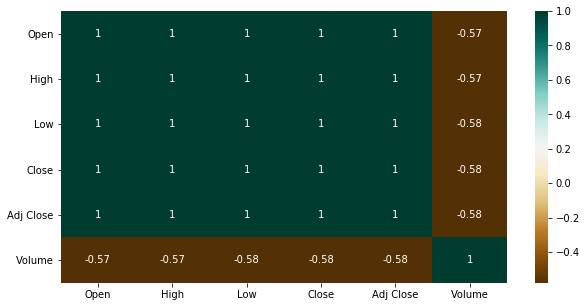

In [19]:
# plot heatmap for Google

plt.figure(figsize=(10,5))
cor_google= df_google.corr()
sns.heatmap(cor_google,cmap="BrBG",annot=True)

cor_google

#### Subset Time Series Data

We will zoom in to 2016 since this was the year the 2 stockes had the biggest price difference.

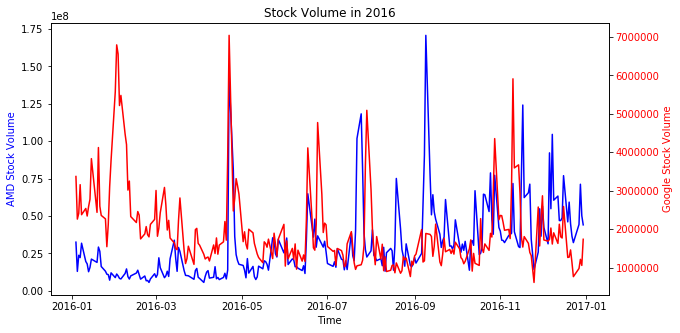

In [20]:
# subset a dataframe for year 2016

year_2016_amd = df_amd['2016-01-01':'2016-12-31']
year_2016_google = df_google['2016-01-01':'2016-12-31']

fig,ax = plt.subplots(figsize=(10,5))
ax.plot(year_2016_amd.index, year_2016_amd['Volume'], color='blue',label='AMD')
ax.set_xlabel('Time')
ax.set_ylabel('AMD Stock Volume',color='blue')
ax.set_title('Stock Volume in 2016')

ax2 = ax.twinx()    
ax2.plot(year_2016_google.index, year_2016_google['Volume'], color='red',label='Google')
ax2.set_ylabel('Google Stock Volume', color='red') 
ax2.tick_params('y',labelcolor='red')             

plt.show()

This concludes our basic practice of EDA.